In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
color=sns.color_palette()
import sklearn.metrics as metrics 

import warnings 
warnings.filterwarnings("ignore")

This dataset is all about the  account of people in bank where we have data about their income , balance in bank , their status as defaulter or not and also their status as student or not.

In [3]:
Default=pd.read_csv('C:\\Users\\Vivek Singh\\Downloads\\archive (3)\\default.csv')

In [4]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [5]:
Default=Default[['default','student','balance','income']]

In [6]:
Default.shape

(10000, 4)

In [7]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


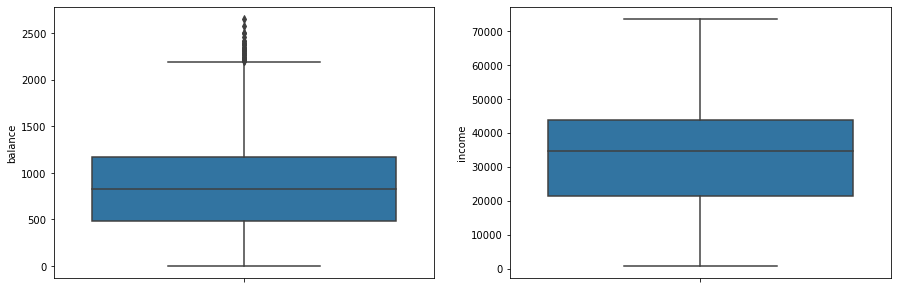

In [8]:
# Visualizing median balance and income

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

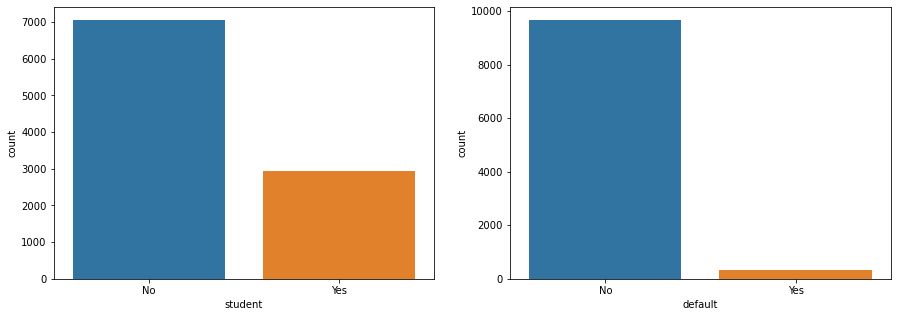

In [9]:
# Showing number of student and number of defaulter 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()

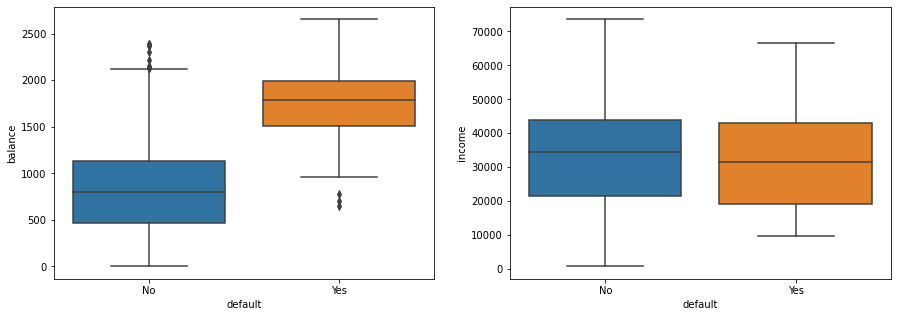

In [10]:
# Making comparison between two variables

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()

In [11]:
#calculate exact number of student
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [12]:
# calculate percentage of number of students
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [13]:
# calculate number of defaulter or not
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [14]:
#calculate number of defaulter or not in terms of percentage
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [15]:
# finding the percentage of student who are defaulter or not
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


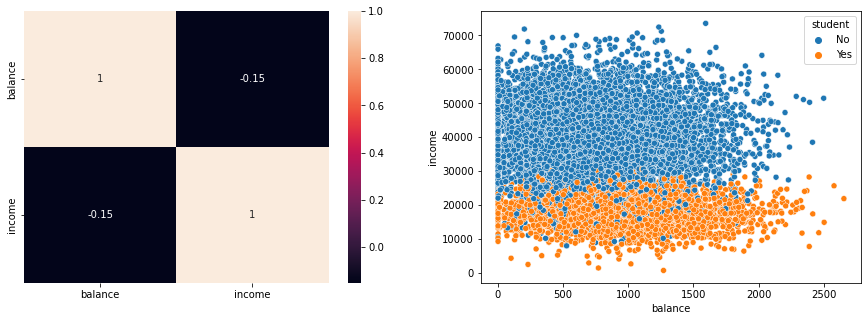

In [16]:
# Finding correlation between income and balance
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(Default[['balance','income']].corr(),annot=True)

plt.subplot(1,2,2)
sns.scatterplot(x='balance',y='income',data=Default,hue='student')
plt.show()

In [17]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [18]:
#Calculate Inter Quartile Range
Q1,Q3=Default['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)
                                  
                                  

In [19]:
UL

2193.174308607817

In [20]:
df=Default[Default['balance']>UL]

In [21]:
df

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [22]:
df['default'].count()

31

In [23]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [24]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

There are 31 outlier are present in the dataset in which 26 are defaulter so we have to compensate the outlier from the dataset.

In [25]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

In [26]:
Default.shape

(10000, 4)

In [27]:
Default[Default['balance']==UL]

,default,student,balance,income
173,Yes,Yes,2193.174309,14271.492253
1136,Yes,No,2193.174309,51504.293960
1160,Yes,Yes,2193.174309,14947.519752
1359,Yes,No,2193.174309,40725.096207
1502,Yes,Yes,2193.174309,11770.234124
1609,Yes,Yes,2193.174309,18021.105948
2096,Yes,Yes,2193.174309,20030.165119
2140,No,Yes,2193.174309,19110.266412
2929,Yes,Yes,2193.174309,28296.914718
3162,Yes,Yes,2193.174309,17429.503375


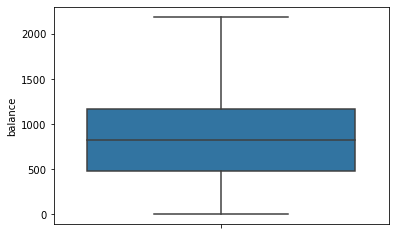

In [28]:
sns.boxplot(y=Default['balance'])
plt.show()

 For algorithm we have to change string value into numeric value so we can use get_dummies function from pandas library

In [29]:
#Here as we can convert 1,0 in the place of Yes , No
Default=pd.get_dummies(Default,drop_first=True)

In [30]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [31]:
#we can change the name of column as:

Default.columns=['balance','income','default','student']

In [32]:
Default.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
# Assinging the value of dependent and independent variable

x=Default.drop('default',axis=1)
y=Default['default']

Here stratify=y beacuse the datset is very unbalanced because the count of  defaulter is very less so we need to distribute uniformly in train and test data.

In [35]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [36]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [37]:
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
0    0.97
1    0.03
Name: default, dtype: float64


For imbalance categories we can use SMOTE(Synthetic Minority Over Sampling Technique) module ,it can increases the sampling value by adding dummy value in the dataset.

In [38]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1


  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Vivek Singh\\AppData\\Local\\Temp\\pip-install-qaxcwtfb\\scikit-learn_f4bf553200d947fe99905a2d59e36cde\\setup.py'"'"'; __file__='"'"'C:\\Users\\Vivek Singh\\AppData\\Local\\Temp\\pip-install-qaxcwtfb\\scikit-learn_f4bf553200d947fe99905a2d59e36cde\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Vivek Singh\AppData\Local\Temp\pip-wheel-dtlggnvy'
       cwd: C:\Users\Vivek Singh\AppData\Local\Temp\pip-install-qaxcwtfb\scikit-learn_f4bf553200d947fe99905a2d59e36cde\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'nu

  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


In [39]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33,sampling_strategy=0.75)
x_res,y_res=sm.fit_sample(x_train,y_train)

Here the  default value of sampling strategy is 0.5 means it divide the datset in two equal part and if we use its value is 0.75 then 3 value comes from less number of data and 1 value comes from more number of data.

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(x_res,y_res)

LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
confusion_matrix(y_test,y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)

Here left diagonal gives correctly classifies value whereas right diagonal gives inaccurately classified value so accuracy is equal to sum of left diagonal element upon sum of all element of matrix. 

In [46]:
#Accuracy of model
(2589+75)/(2589+75+311+25)


0.888